# Customer Lifetime Value
All of the images are taken in this [post](https://blog.hubspot.com/service/how-to-calculate-customer-lifetime-value). Read the article to understand CLTV to understand deeply.

## Overview
Customer lifetime value (CLV) is a measure of the average customer's revenue generated over their entire relationship with a company. Comparing CLV to customer acquisition cost is a quick method of estimating a customer's profitability and the business's potential for long-term growth.


### Goal: 
This time the goal is to segment existing customers according to CLTV metric.

----

## Part One: Understanding the Background and Data

Dataset named Online Retail II UK based online store Between 01/12/2009 - 09/12/2011 includes sales. Souvenirs in the product catalog of this company items are included. As promotional items can also be considered.It is also known that most of its customers are wholesalers available.

https://archive.ics.uci.edu/ml/datasets/Online+Retail+II

----


### The Data



#### online_retail_II.xlsx

Variable | Definition | Type of Variable
--- | ----------- | --------
InvoiceNo | Invoice number. 6-digit integral number uniquely assigned to each transaction.  | Nominal
          | **If this code starts with letter 'c', it indicates a cancellation.**
StockCode | Product (item) code. 5-digit integral number uniquely assigned to each distinct product.| Nominal
Description | Product (item) name. | Nominal
Quantity | The quantities of each product (item) per transaction. | Numeric
InvoiceDate | Invoice Date and time. The day and time when each transaction was generated.| Numeric
UnitPrice|  Unit price. Product price per unit in £ (in GBP) |  Numeric
CustomerID | Customer number. 5-digit integral number uniquely assigned to each customer.| Nominal
Country | Country name. The name of the country where each customer resides. | Nominal

-----------
**Import libraries**

In [1]:
import pandas as pd
import datetime as dt

In [2]:
# Displaying all rows and columns
pd.set_option('display.max_columns', None); 
pd.set_option('display.max_rows', None);

# Configuring significant figures
pd.set_option('display.float_format', lambda x: '%.2f' % x)

**Read "online_retail_II.xlsx" file**

In [3]:
df_ = pd.read_excel("Data/online_retail_II.xlsx", sheet_name="Year 2010-2011")
df = df_.copy()

In [4]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom


**Removing cancelled transcations (which are our outliers in the dataset)**

In [6]:
df[~df["Invoice"].str.contains("C", na=False)]
df = df[df["Quantity"] > 0]
df.dropna(inplace=True)

# Part Two: Calculating CLTV Metrics

In [7]:
df["TotalPrice"] = df["Quantity"] * df["Price"]

In [8]:
df_cltv = df.groupby('Customer ID').agg({'Invoice': lambda x: len(x),
                                         'Quantity': lambda x: x.sum(),
                                         'TotalPrice': lambda x: x.sum()})
df_cltv.columns = ['total_transaction', 'total_unit', 'total_price']
df_cltv.head()

,total_transaction,total_unit,total_price
Customer ID,,,
12346.00,1,74215,77183.60
12347.00,182,2458,4310.00
12348.00,31,2341,1797.24
12349.00,73,631,1757.55
12350.00,17,197,334.40


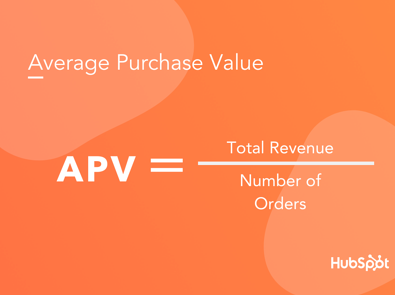

In [9]:
df_cltv["average_order_value"] = df_cltv["total_price"] / df_cltv["total_transaction"]
df_cltv.head()

,total_transaction,total_unit,total_price,average_order_value
Customer ID,,,,
12346.00,1,74215,77183.60,77183.60
12347.00,182,2458,4310.00,23.68
12348.00,31,2341,1797.24,57.98
12349.00,73,631,1757.55,24.08
12350.00,17,197,334.40,19.67


# Number of Unique Customers

In [10]:
df_cltv.shape[0]

4339

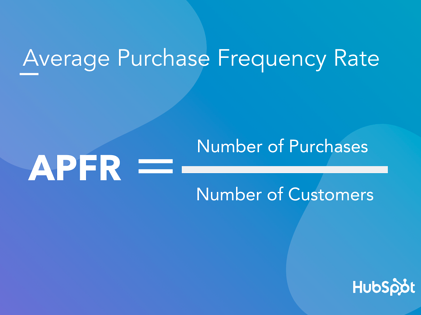

In [11]:
df_cltv["purchase_frequency"] = df_cltv['total_transaction'] / df_cltv.shape[0]
df_cltv.head()

,total_transaction,total_unit,total_price,average_order_value,purchase_frequency
Customer ID,,,,,
12346.00,1,74215,77183.60,77183.60,0.00
12347.00,182,2458,4310.00,23.68,0.04
12348.00,31,2341,1797.24,57.98,0.01
12349.00,73,631,1757.55,24.08,0.02
12350.00,17,197,334.40,19.67,0.00


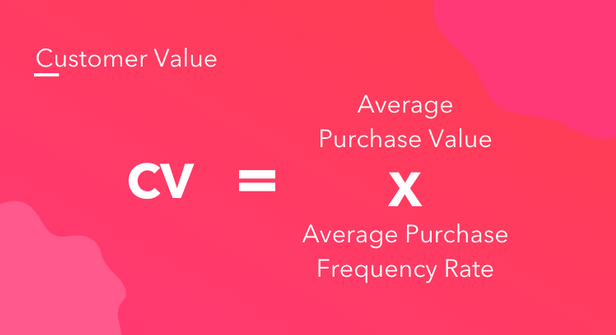

In [12]:
df_cltv["customer_value"] = df_cltv["average_order_value"] * df_cltv["purchase_frequency"]
df_cltv.head()

,total_transaction,total_unit,total_price,average_order_value,purchase_frequency,customer_value
Customer ID,,,,,,
12346.00,1,74215,77183.60,77183.60,0.00,17.79
12347.00,182,2458,4310.00,23.68,0.04,0.99
12348.00,31,2341,1797.24,57.98,0.01,0.41
12349.00,73,631,1757.55,24.08,0.02,0.41
12350.00,17,197,334.40,19.67,0.00,0.08


# Churn_Rate = 1 - Repeat_Rate

In [19]:
repeat_rate = df_cltv[df_cltv["total_transaction"] > 1].shape[0] / df_cltv.shape[0]
churn_rate = 1 - repeat_rate
print("Repeat Rate: ", repeat_rate*100)
print("Churn Rate: ", churn_rate*100)

Repeat Rate:  98.34063148190828
Churn Rate:  1.6593685180917306


# Profit Margin

In [14]:
df_cltv["profit_margin"] = df_cltv["total_price"] * 0.05

In [15]:
# CLTV = (Customer_Value / Churn_Rate) x Profit_margin.
df_cltv["CLTV"] = (df_cltv["customer_value"] / churn_rate) * df_cltv["profit_margin"]
df_cltv.head()

,total_transaction,total_unit,total_price,average_order_value,purchase_frequency,customer_value,profit_margin,CLTV
Customer ID,,,,,,,,
12346.00,1,74215,77183.60,77183.60,0.00,17.79,3859.18,4137019.52
12347.00,182,2458,4310.00,23.68,0.04,0.99,215.50,12900.07
12348.00,31,2341,1797.24,57.98,0.01,0.41,89.86,2243.11
12349.00,73,631,1757.55,24.08,0.02,0.41,87.88,2145.13
12350.00,17,197,334.40,19.67,0.00,0.08,16.72,77.66


# Segmentation

In [16]:
df_cltv["Segment"] = pd.qcut(df_cltv["CLTV"], 5, labels=["E", "D", "C", "B", "A"])

df_cltv[["total_price", "CLTV", "Segment"]].sort_values(by="Segment", ascending=False).head()

,total_price,CLTV,Segment
Customer ID,,,
12346.00,77183.60,4137019.52,A
14711.00,2868.80,5715.29,A
14769.00,10674.75,79132.14,A
14766.00,2473.37,4248.30,A
14755.00,5010.28,17432.57,A
